In [1]:
from ecallisto_ng.plotting.plotting import plot_with_fixed_resolution_mpl
from ecallisto_ng.data_fetching.get_information import get_tables, get_table_names_with_data_between_dates
from datetime import datetime, timedelta

In [2]:
start_datetime = (datetime.now() - timedelta(hours=28)).strftime("%Y-%m-%d %H:%M:%S")
end_datetime = (datetime.now() - timedelta(hours=5)).strftime("%Y-%m-%d %H:%M:%S")

In [6]:
get_table_names_with_data_between_dates(
    start_datetime=start_datetime,
    end_datetime=end_datetime
)

File downloaded successfully


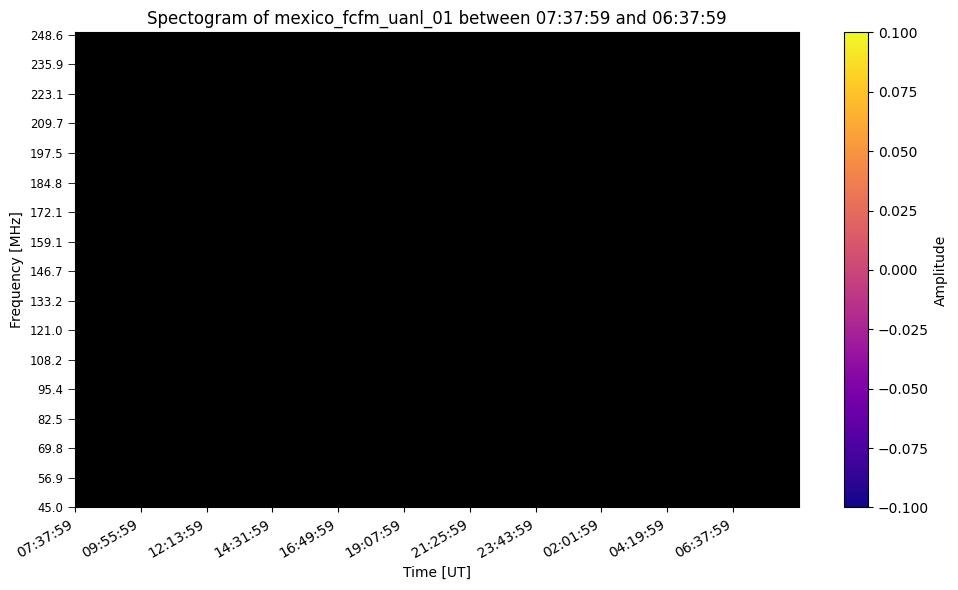

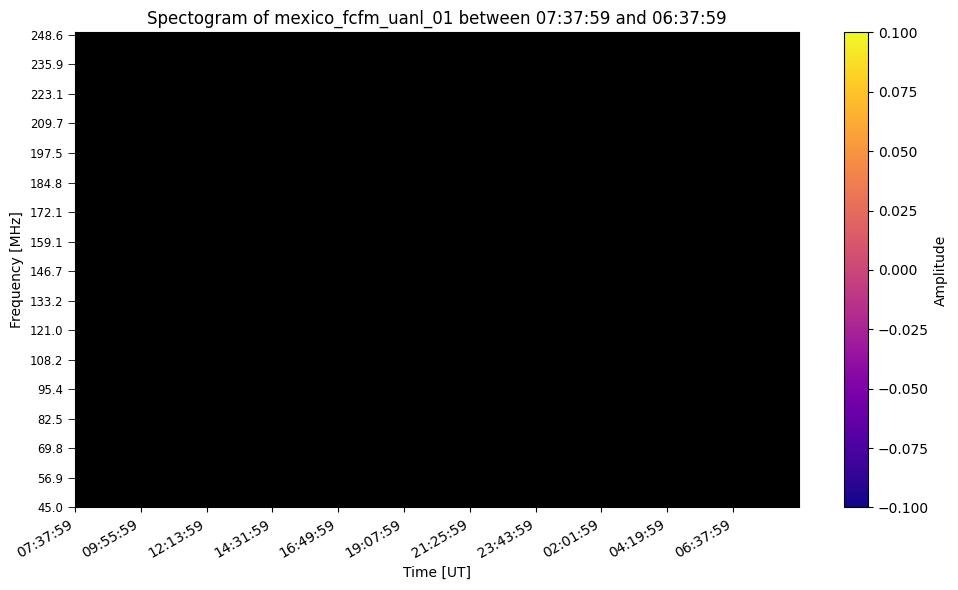

In [4]:
plot_with_fixed_resolution_mpl('mexico_fcfm_uanl_01', start_datetime, end_datetime, 'MAX', 900)

In [20]:
from radiospectra.sources import CallistoSpectrogram

In [55]:
spec = CallistoSpectrogram.read('/home/kenfus/ecallisto_ng/SWISS-MUHEN_20230903_114500_63.fit.gz', cache=False)

In [24]:
def masked_spectogram_to_array(spectogram):
    """
    Converts a masked spectogram to an array by removing all masked values.
    """
    # Get row with no masked values
    idxs = np.where(~np.any(np.ma.getmaskarray(spectogram.data), axis=1))[0]
    # Keep only frequencies with no masked values
    spectogram.freq_axis = spectogram.freq_axis[idxs]
    # keep only rows in idxs
    data = np.ma.getdata(spectogram.data)
    spectogram.data = data[idxs, :]

    return spectogram

In [62]:
from database_utils import add_spec_from_path_to_database

ModuleNotFoundError: No module named 'database_utils'

In [56]:
spec_time_to_pd_datetime(spec)

DatetimeIndex(['2023-09-03 11:45:00.630000', '2023-09-03 11:45:00.880000',
               '2023-09-03 11:45:01.130000', '2023-09-03 11:45:01.380000',
               '2023-09-03 11:45:01.630000', '2023-09-03 11:45:01.880000',
               '2023-09-03 11:45:02.130000', '2023-09-03 11:45:02.380000',
               '2023-09-03 11:45:02.630000', '2023-09-03 11:45:02.880000',
               ...
               '2023-09-03 11:59:58.130000', '2023-09-03 11:59:58.380000',
               '2023-09-03 11:59:58.630000', '2023-09-03 11:59:58.880000',
               '2023-09-03 11:59:59.130000', '2023-09-03 11:59:59.380000',
               '2023-09-03 11:59:59.630000', '2023-09-03 11:59:59.880000',
               '2023-09-03 12:00:00.130000', '2023-09-03 12:00:00.380000'],
              dtype='datetime64[ns]', length=3600, freq='250L')

In [57]:
spec = CallistoSpectrogram.read('/home/kenfus/ecallisto_ng/SWISS-MUHEN_20230903_120000_63.fit.gz', cache=False)

In [58]:
spec_time_to_pd_datetime(spec)

DatetimeIndex(['2023-09-03 12:00:00.689000', '2023-09-03 12:00:00.939000',
               '2023-09-03 12:00:01.189000', '2023-09-03 12:00:01.439000',
               '2023-09-03 12:00:01.689000', '2023-09-03 12:00:01.939000',
               '2023-09-03 12:00:02.189000', '2023-09-03 12:00:02.439000',
               '2023-09-03 12:00:02.689000', '2023-09-03 12:00:02.939000',
               ...
               '2023-09-03 12:14:58.189000', '2023-09-03 12:14:58.439000',
               '2023-09-03 12:14:58.689000', '2023-09-03 12:14:58.939000',
               '2023-09-03 12:14:59.189000', '2023-09-03 12:14:59.439000',
               '2023-09-03 12:14:59.689000', '2023-09-03 12:14:59.939000',
               '2023-09-03 12:15:00.189000', '2023-09-03 12:15:00.439000'],
              dtype='datetime64[ns]', length=3600, freq='250L')

In [29]:
import numpy as np
import pandas as pd

In [59]:
spec_ = masked_spectogram_to_array(spec)

In [30]:
def int_time_delta_to_pd_timedelta(int_time_delta):
    return pd.Timedelta(seconds=int_time_delta)

def spec_time_to_pd_datetime(spec):
    start_time = pd.to_datetime(spec.start)
    time_axis = spec.time_axis
    time_frequency = spec.time_axis[1] - spec.time_axis[0]
    datetime_range = pd.date_range(
        start_time,
        periods=len(time_axis),
        freq=int_time_delta_to_pd_timedelta(time_frequency),
    )
    return datetime_range

In [34]:
def np_array_to_postgresql_array_with_datetime_index(index, array):
    """
    Converts a numpy array and a datetime index to a string that can be used in a postgresql array.

    Args:
        index (list): a list of datetime objects representing the index of the input numpy array
        array (numpy.ndarray): the input numpy array

    Returns:
        str: a string representation of the numpy array and datetime index in a format that can be used in a postgresql array
    """
    # Convert the datetime index to strings in a format that can be used in a postgresql array
    index_strings = [val.strftime("%Y-%m-%d %H:%M:%S.%f") for val in index]

    # Convert the numpy array to a list of tuples
    list_of_tuples = [tuple(row) for row in zip(index_strings, *array.tolist())]

    # Use the str function to format each tuple as a string
    formatted_list = [str(tup) for tup in list_of_tuples]

    # Join the strings with a comma to create the final format
    final_format = ",".join(formatted_list)
    return final_format

In [60]:
data = np.array(spec.data, dtype=np.int16)

In [61]:
data.shape

(192, 3600)

In [39]:
test = np_array_to_postgresql_array_with_datetime_index(spec_time_to_pd_datetime(spec), data)

In [42]:
print(test[0:1000])

('2023-09-03 13:45:00.760000', 180, 175, 171, 168, 176, 183, 185, 185, 188, 191, 201, 186, 177, 183, 189, 190, 189, 192, 175, 169, 181, 190, 193, 194, 190, 184, 173, 167, 176, 180, 177, 174, 171, 171, 163, 161, 167, 170, 169, 170, 166, 166, 176, 161, 165, 168, 175, 179, 176, 172, 166, 167, 175, 182, 181, 182, 179, 176, 168, 168, 174, 176, 175, 175, 174, 173, 168, 166, 171, 171, 170, 171, 171, 169, 170, 170, 172, 175, 177, 177, 175, 172, 173, 171, 173, 174, 173, 171, 171, 171, 174, 176, 177, 179, 180, 181, 179, 180, 179, 177, 177, 179, 178, 177, 175, 175, 175, 176, 175, 173, 171, 168, 167, 167, 167, 167, 168, 169, 175, 174, 169, 172, 172, 172, 173, 173, 173, 178, 178, 179, 180, 179, 179, 182, 181, 178, 180, 183, 189, 186, 185, 179, 176, 177, 176, 179, 191, 187, 190, 182, 172, 175, 176, 177, 182, 193, 202, 188, 199, 201, 184, 185, 179, 175, 179, 182, 174, 170, 171, 176, 169, 180, 185, 209, 191, 183, 192, 165, 163, 175, 171, 165, 154, 156, 175, 145, 135, 135, 138, 146, 141, 131),('2023-09

In [ ]:
spec_time_to_pd_datetime(spec)

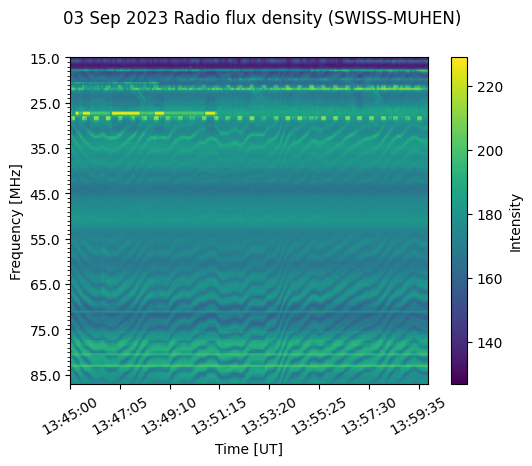

<Axes: xlabel='Time [UT]', ylabel='Frequency [MHz]'>

In [28]:
spec_.peek()